In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('BigMart.csv')

In [3]:
data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
data.shape

(8523, 12)

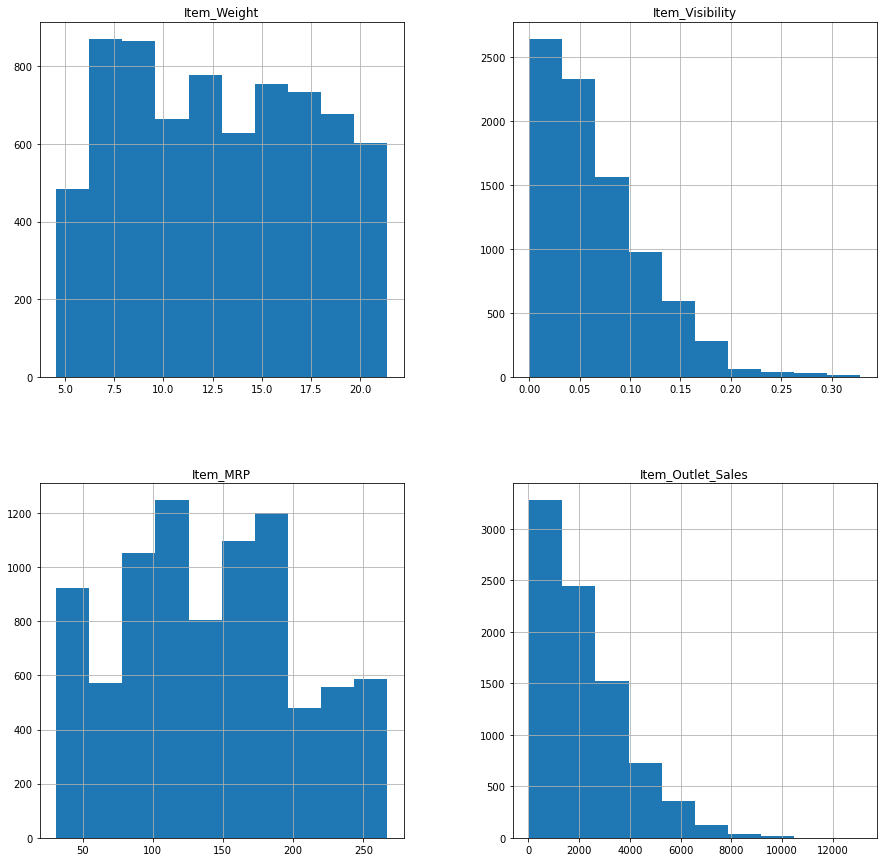

In [6]:
freqgraph=data.select_dtypes(include='float')
freqgraph.hist(figsize=(15,15))
plt.show()

In [7]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
#handling Missing values

In [9]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
data['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
FDW49     9
FDV38     9
NCL31     9
         ..
FDY43     1
FDK57     1
FDC23     1
FDQ60     1
FDT35     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [11]:
gp=pd.DataFrame(data.groupby('Item_Identifier')['Item_Weight'].mean())

In [12]:
gp

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [13]:
df=pd.DataFrame(data)

In [14]:
df['Item_Weight']=df.groupby('Item_Identifier')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

In [15]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [27]:
df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [28]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [19]:
#outlier

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

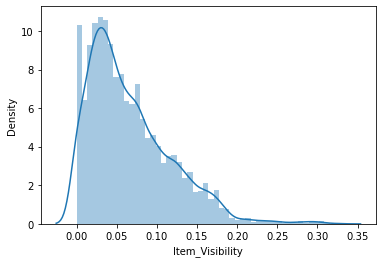

In [20]:
sns.distplot(df['Item_Visibility'])

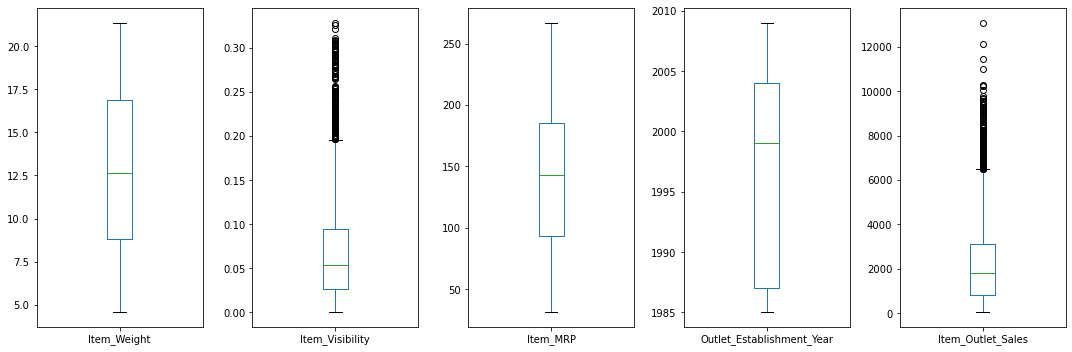

In [21]:
df.plot(kind= "box",figsize=(15,5),subplots=True)
plt.tight_layout()
plt.show()

# label encoding

In [22]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [23]:
df.select_dtypes('object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [24]:
cat=['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier','Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

In [29]:
for j in cat:
    print(j)
    print(df[j].unique())

Item_Identifier
[ 156    8  662 ... 1323 1524 1519]
Item_Fat_Content
[1 2 3 0 4]
Item_Type
[ 4 14 10  6  9  0 13  5  2  8  7  3  1 15 11 12]
Outlet_Identifier
[9 3 0 1 5 7 2 8 6 4]
Outlet_Size
['Medium' 'High' 'Small']
Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [30]:
from sklearn.preprocessing import LabelEncoder
for i in cat:    
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])

In [31]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# splitting

In [32]:
X = df.drop(['Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.5)

In [34]:
X_train.shape

(4261, 11)

In [35]:
X_test.shape

(4262, 11)

# LR

In [36]:
from sklearn.metrics import mean_squared_error,r2_score

In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [38]:
print('MSE is :',mean_squared_error(y_test,y_pred))
print('r squared value is :',r2_score(y_test,y_pred))

MSE is : 1377588.875663373
r squared value is : 0.5116823301813604


# kNN

In [39]:
from sklearn.neighbors import KNeighborsRegressor
metric_k = []
neighbors = np.arange(3,20)

for k in neighbors:
    kn = KNeighborsRegressor(n_neighbors=k, metric='minkowski')
    kn.fit(X_train,y_train)
    y_pred = kn.predict(X_test)
    acc = mean_squared_error(y_test,y_pred)
    metric_k.append(acc)

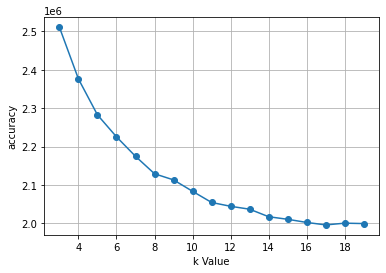

In [40]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()

In [41]:
kn = KNeighborsRegressor(n_neighbors=3, metric='minkowski')
kn.fit(X_train,y_train)
y_pred = kn.predict(X_test)
print('MSE is :',mean_squared_error(y_test,y_pred))
print('r squared value is :',r2_score(y_test,y_pred))

MSE is : 2510731.9954559267
r squared value is : 0.11001401127767618


# SVM

In [42]:
from sklearn.svm import SVR
sm = SVR(kernel="poly",degree=3)
sm.fit(X_train, y_train)
y_pred = sm.predict(X_test)

In [43]:
print('MSE is :',mean_squared_error(y_test,y_pred))
print('r squared value is :',r2_score(y_test,y_pred))

MSE is : 2908008.8221219196
r squared value is : -0.030809784339185464


# Decision tree

In [44]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [45]:
print('MSE is :',mean_squared_error(y_test,y_pred))
print('r squared value is :',r2_score(y_test,y_pred))

MSE is : 2444898.4257474584
r squared value is : 0.13335021551379245


# Random Forest

In [46]:
from sklearn.ensemble import RandomForestRegressor
rc = RandomForestRegressor()
rc.fit(X_train, y_train)
y_pred = rc.predict(X_test)

In [47]:
print('MSE is :',mean_squared_error(y_test,y_pred))
print('r squared value is :',r2_score(y_test,y_pred))

MSE is : 1264985.7720024264
r squared value is : 0.5515970581277383


# Testing

In [48]:
test = pd.read_csv('test_AbJTz2l.csv')

In [49]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [50]:
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [51]:
d=pd.DataFrame(test)

In [52]:
d=d.astype({'Item_Identifier':str,'Item_Fat_Content':str,'Item_Type':str,'Outlet_Identifier':str})

In [53]:
d.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [54]:
d.select_dtypes('object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [55]:
cal=['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

In [56]:
for j in cal: 
    print(j)
    print(d[j].unique())
    

Item_Identifier
['FDW58' 'FDW14' 'NCN55' ... 'NCI29' 'FDP28' 'FDF04']
Item_Fat_Content
['Low Fat' 'reg' 'Regular' 'LF' 'low fat']
Item_Type
['Snack Foods' 'Dairy' 'Others' 'Fruits and Vegetables' 'Baking Goods'
 'Health and Hygiene' 'Breads' 'Hard Drinks' 'Seafood' 'Soft Drinks'
 'Household' 'Frozen Foods' 'Meat' 'Canned' 'Starchy Foods' 'Breakfast']
Outlet_Identifier
['OUT049' 'OUT017' 'OUT010' 'OUT027' 'OUT046' 'OUT018' 'OUT045' 'OUT019'
 'OUT013' 'OUT035']
Outlet_Size
['Medium' nan 'Small' 'High']
Outlet_Location_Type
['Tier 1' 'Tier 2' 'Tier 3']
Outlet_Type
['Supermarket Type1' 'Grocery Store' 'Supermarket Type3'
 'Supermarket Type2']


In [67]:
d.isna().sum()

Item_Identifier               0
Item_Weight                  20
Item_Fat_Content              0
Item_Visibility               0
Item_Type                     0
Item_MRP                      0
Outlet_Identifier             0
Outlet_Establishment_Year     0
Outlet_Size                   0
Outlet_Location_Type          0
Outlet_Type                   0
dtype: int64

In [57]:
d['Outlet_Size']=d['Outlet_Size'].fillna(d['Outlet_Size'].mode()[0])

In [65]:
d['Item_Weight']=d.groupby('Item_Identifier')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

In [71]:
d['Item_Weight']=d['Item_Weight'].fillna(d['Item_Weight'].mean())

In [72]:
for i in cal:    
    le = LabelEncoder()
    d[i] = le.fit_transform(d[i])

In [73]:
result =rc.predict(d)

In [74]:
test['result']=result

In [75]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,result
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1657.608970
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,1380.569590
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,687.751426
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,2521.863976
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,6374.042958
